In [185]:
#Analysis

#My analysis of the 4 main drugs Capomulin, Infubinol, Ketapril, and the unknown Placebo is incomplete due me not having enough data. I was unable to plot 3 out of the 4 graphs we supposed to graph. 

# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"





In [186]:
#Open and read trial data into dataframe
csv_path = 'data/clinicaltrial_data.csv'

clinical_df = pd.read_csv(csv_path)
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [187]:
#Open and read mouse data into dataframe 
csv_path = 'data/mouse_drug_data.csv'

mouse_df = pd.read_csv(csv_path)
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [188]:
#Combine data into single dataset

merged_data = pd.merge(clinical_df, mouse_df, on="Mouse ID", how="inner")

merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [189]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
byDrug = merged_data.pivot_table(values='Tumor Volume (mm3)', index=['Drug', 'Timepoint'])

# Preview 
byDrug.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [190]:
# Minor Data Munging to Re-Format the Data Frames
timeline = merged_data.pivot_table(values='Tumor Volume (mm3)', index = 'Timepoint', columns = 'Drug')
# Preview that Reformatting worked

timeline.head(10)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


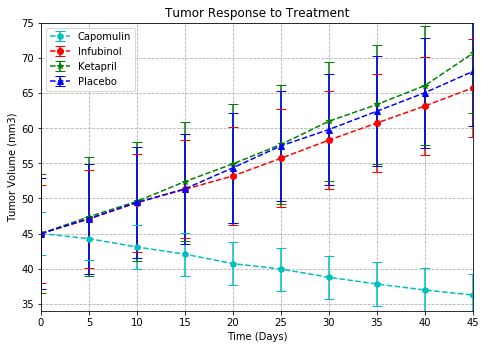

In [191]:
# Generate the Plot (with Error Bars) #For loop
fig = plt.figure()
ax1 =fig.add_axes([0,0,1,1])

#Plot lines for different drugs, ax = plt.subplots()
Capomulin_std = timeline['Capomulin'].std()
Infubinol_std = timeline['Infubinol'].std()
Ketapril_std = timeline['Ketapril'].std()
Placebo_std = timeline['Placebo'].std()

Capomulin = plt.errorbar(timeline.index, timeline['Capomulin'], yerr=Capomulin_std, color='c', fmt='--h', 
    capsize=5, label = 'Capomulin')

Infubinol = plt.errorbar(timeline.index, timeline['Infubinol'], yerr=Infubinol_std, color='r', fmt='--o', 
    capsize=5, label = 'Infubinol')

Ketapril = plt.errorbar(timeline.index, timeline['Ketapril'], yerr=Ketapril_std, color='g', fmt='--*', 
    capsize=5, label = 'Ketapril')

Placebo = plt.errorbar(timeline.index, timeline['Placebo'], yerr=Placebo_std, color='b', fmt='--^', 
    capsize=5, label = 'Placebo')

#Add grid plot limits
ax1.set_xlim(0,45)
ax1.set_ylim(34,75)
ax1.grid(linestyle='--')


#Add labels
ax1.legend (loc="Best")  
ax1.set_title("Tumor Response to Treatment")           
ax1.set_xlabel("Time (Days)")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.grid(linestyle='--')
             



# Save the Figureline
fig.savefig("TumorResponsetoTreatment.png")
plt.show()



![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [192]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_response_error = merged_data.groupby(['Drug', 'Timepoint'])["Metastatic Sites"].sem()
mre_df = meta_response_error.to_frame()
# Preview DataFrame
mre_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [193]:
merged_data.groupby('Drug')["Timepoint"].count()
meta_response = merged_data.groupby(['Drug', 'Timepoint'])
meta_df = meta_response["Metastatic Sites"].mean().to_frame()
meta_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [194]:
## Store the Mean Met. Site Data Grouped by Drug and Timepoint 
Timepoint = merged_data.pivot_table(values='Metastatic Sites', index = 'Timepoint', columns='Drug')
#Preview dataframe
Timepoint

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [195]:
# Generate the Plot (with Error Bars)

plt.figure(figsize=(10,7))



#Plot lines for different drugs, ax = plt.subplots()

error = mre_df["Metastatic Sites"]["Capomulin"]
Cap = plt.errorbar(x_axis, meta_df["Capomulin"], yerr=error, color='c', fmt='--h', 
    ls="dashed", linewidth=1, alpha=1, capsize=5)

error = mre_df["Metastatic Sites"]["Infubinol"]
Inf = plt.errorbar(x_axis, meta_df["Infubinol"], yerr=error, color='r', fmt='--o', 
    ls="dashed", linewidth=1, alpha=1, capsize=5)

error = mre_df["Metastatic Sites"]["Ketapril"]
Keta = plt.errorbar(x_axis, meta_df["Ketapril"], yerr=error, color='g', fmt='--*', 
    ls="dashed", linewidth=1, alpha=1, capsize=5)

error = mre_df["Metastatic Sites"]["Placebo"]
Place = plt.errorbar(x_axis, meta_df["Placebo"], yerr=error, color='b', fmt='--^', 
    ls="dashed", linewidth=1, alpha=1, capsize=5)

#Add grid plot limits
plt.xlim(0, 4)
plt.ylim(0, 45)
plt.grid(linestyle='--')


#Add labels
plt.legend ((Cap, Inf, Keta, Place), ("Capomulin", "Infubinol", "Ketapril", "Placebo"), fontsize=12) 
plt.set_title("Metastatic Spread During Treatment", fontsize=20)           
plt.xlabel("Treatment Duration (Days)", fontsize=14)
plt.ylabel("Metastatic Sites", fontsize-14)

             



# Save the Figureline
fig.savefig("MetastaticSpreadDuringTreat.png")
plt.show()



# Save the Figure

# Show the Figure


NameError: name 'x_axis' is not defined

<Figure size 720x504 with 0 Axes>

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [196]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouse = merged_data.groupby(["Drug", "Timepoint"])["Mouse ID"].nunique()
# Convert to DataFrame
mice = mouse.to_frame()
mice = mice.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
mice.head()

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23

In [197]:
mice_plot = mice.unstack(0)
mice_df = mice_plot["Mouse Count"]
mice_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [198]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [199]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [200]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [184]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)